<a href="https://colab.research.google.com/github/natashanuto/CEE2/blob/main/trabalho_ce2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

O Airbnb transformou a forma como pessoas buscam e oferecem acomodações temporárias, impactando tanto o setor de turismo quanto o mercado imobiliário em grandes cidades. Este trabalho tem como objetivo analisar dados reais da plataforma, com foco específico na cidade de Barcelona, uma das principais capitais turísticas da Europa. Utilizando a linguagem Python, serão aplicadas técnicas de análise estatística, visualização de dados e modelagem preditiva, incluindo a construção de um modelo de regressão linear simples. Através dessa abordagem, busca-se entender os principais fatores que influenciam o preço das hospedagens e oferecer uma visão clara sobre a dinâmica do mercado de aluguel por temporada na cidade.

# Desenvolvimento

Inicialmente, é necessário obter uma visão geral das variáveis presentes no banco.

### Primeiras 5 linhas do banco:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

banco = pd.read_csv('Barcelona.csv')

banco.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
0,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia Maria,Eixample,la Sagrada Família,41.40556,2.17262,Entire home/apt,179.0,1.0,45,2024-09-16,0.31,29.0,147.0,5,HUTB-002062;
1,"23197,""Forum CCIB DeLuxe, Spacious, Large Balc...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,32711,Sagrada Familia area - Còrsega 1,135703,Nick,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40566,2.17015,Entire home/apt,104.0,1.0,143,2025-03-04,0.86,3.0,107.0,31,HUTB-001722;
3,34241,Stylish Top Floor Apartment - Ramblas Plaza Real,73163,Andres,Ciutat Vella,el Barri Gòtic,41.38062,2.17517,Entire home/apt,157.0,31.0,25,2024-11-05,0.14,3.0,327.0,15,Exempt;
4,34981,VIDRE HOME PLAZA REAL on LAS RAMBLAS,73163,Andres,Ciutat Vella,el Barri Gòtic,41.37978,2.17623,Entire home/apt,401.0,5.0,256,2025-02-02,1.46,3.0,191.0,34,HUTB-150671;



### Últimas 5 linhas do banco:

In [ ]:
banco.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license;
19450,1366108822123777508,Habitacion Privada,413160011,Loucie And John,Gràcia,la Vila de Gràcia,41.399074,2.159820393393397,Private room,27.0,31.0,0,NaN,NaN,8.0,348.0,0,Exempt;
19451,1366453124999573764,Cozy Double Room in City Center,534870364,Juan,Eixample,la Dreta de l'Eixample,41.391440,2.17649,Private room,60.0,1.0,0,NaN,NaN,6.0,1.0,0,Exempt;
19452,1366459989694212599,140. Poble Sec Ent Apartment,396363,Alcam Apartments,Sants-Montjuïc,el Poble Sec,41.371550,2.15987,Entire home/apt,103.0,33.0,0,NaN,NaN,75.0,359.0,0,;
19453,1366500461965716620,Big Room with Work Desk - RDL0520003,518888520,David,Eixample,la Dreta de l'Eixample,41.392220,2.16825,Private room,31.0,32.0,0,NaN,NaN,98.0,278.0,0,;
19454,1366501139971684620,Your Boutique Mediterranean Stay in Barcelona,124887626,Ana,Eixample,la Sagrada Família,41.404897,2.1807924290537146,Entire home/apt,307.0,2.0,1,2025-03-05,1.0,1.0,51.0,1,HUTB-003778;



### Nomes das colunas, valores nulos e tipos de dados:

In [ ]:
banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19455 entries, 0 to 19454
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              19455 non-null  object 
 1   name                            16643 non-null  object 
 2   host_id                         16643 non-null  object 
 3   host_name                       16636 non-null  object 
 4   neighbourhood_group             16643 non-null  object 
 5   neighbourhood                   16643 non-null  object 
 6   latitude                        16643 non-null  float64
 7   longitude                       16643 non-null  object 
 8   room_type                       16643 non-null  object 
 9   price                           13158 non-null  float64
 10  minimum_nights                  16643 non-null  float64
 11  number_of_reviews               16643 non-null  object 
 12  last_review                     

Com base nessas informações, obtêm-se uma noção preliminar dos dados a serem analisados. Primeiramente, o banco conta com 19422 linhas e 18 colunas. As variáveis observadas estão descritas a seguir:

|Variável     |Descrição         |Tipo           |
|-------------|------------------|---------------|
|`id`| Identificador único do anúncio | Categórica|
|`name`| Nome (título) do anúncio | Categórica |
|`host_id`| Identificador único do anfitrião | Categórica|
|`host_name`| Nome do anfitrião| Categórica |
|`neighbourhood_group`| Agrupamento de bairros| Categórica |
|`neighbourhood`| Bairro ou região onde o imóvel está localizado|  Catagórica |
|`latitude`| Latitude da localização do imóvel| Numérica |
|`longitude`| Longitude da localização do imóvel | Numérica |
|`room_type`| Tipo de acomodação | Categórica |
|`price`| Preço da diária em euros | Numérica |
|`minimun_nights`| Número mínimo de noites exigidas para reserva | Numérica |
|`number_of_reviews`| Quantidade total de avaliações recebidas pelo anúncio |Numérica |
|`last_review`| Data da última avaliação recebida (se houver) | Data |
|`reviews_per_month`| Média de avaliações recebidas por mês | Numérica |
|`calculated_host_listings_count `| Número de anúncios ativos do mesmo anfitrião | Numérica |
|`availability_365`| Número de dias no ano em que o imóvel está disponível para reserva | Numérica |
|`number_of_reviews_ltm`| ??????????| Binária |
|`license`| ???????????? | Categórica |

Os tipos das variáveis `id` e `host_id`, que são lidas como interos, devem ser corrigidos para string, tendo em vista que são variáveis identificadoras.

In [ ]:
banco["id"] = banco["id"].astype(str)
banco["host_id"] = banco["host_id"].astype(str)

Em seguida, verifica-se a frequência absoluta e a porcentagem de valores nulos em cada coluna.

In [ ]:
banco.isnull().sum()

,0
id,0
name,2812
host_id,0
host_name,2819
neighbourhood_group,2812
neighbourhood,2812
latitude,2812
longitude,2812
room_type,2812
price,6297


In [ ]:
banco.isnull().mean() * 100

,0
id,0.000000
name,14.453868
host_id,0.000000
host_name,14.489848
neighbourhood_group,14.453868
neighbourhood,14.453868
latitude,14.453868
longitude,14.453868
room_type,14.453868
price,32.367001


As linhas com observações faltantes serão filtradas com base nas colunas que estiverem sendo utilizadas para análise.

A tabela a seguir fornece uma resumo das variáveis numéricas observadas:

In [ ]:
round(banco.describe(), 2)

,latitude,price,minimum_nights,reviews_per_month,calculated_host_listings_count,availability_365
count,16643.00,13158.00,16643.00,12352.00,16643.00,16643.00
mean,41.39,164.31,14.83,1.48,50.38,162.68
std,0.30,346.50,27.50,1.98,105.28,130.76
min,2.13,3.00,1.00,0.01,1.00,0.00
25%,41.38,65.00,1.00,0.22,2.00,1.00
50%,41.39,117.00,3.00,0.84,7.00,176.00
75%,41.40,181.00,31.00,2.22,35.00,281.00
max,41.46,10000.00,1124.00,79.12,483.00,365.00


Para o preço, que é a principal variável de interesse, foram observadas as seguintes medidas descritivas:

In [ ]:
print("Média:", round(banco["price"].mean(), 2))
print("Mediana:", round(banco["price"].median(), 2))
print("Desvio padrão:", round(banco["price"].std(), 2))
print("Valor mínimo:", round(banco["price"].min(), 2))
print("Valor máximo:", round(banco["price"].max(), 2))

Média: 164.31
Mediana: 117.0
Desvio padrão: 346.5
Valor mínimo: 3.0
Valor máximo: 10000.0


Ademais, os gráficos abaixo permitem uma visualização mais detalhada da distribuição dessa variável.

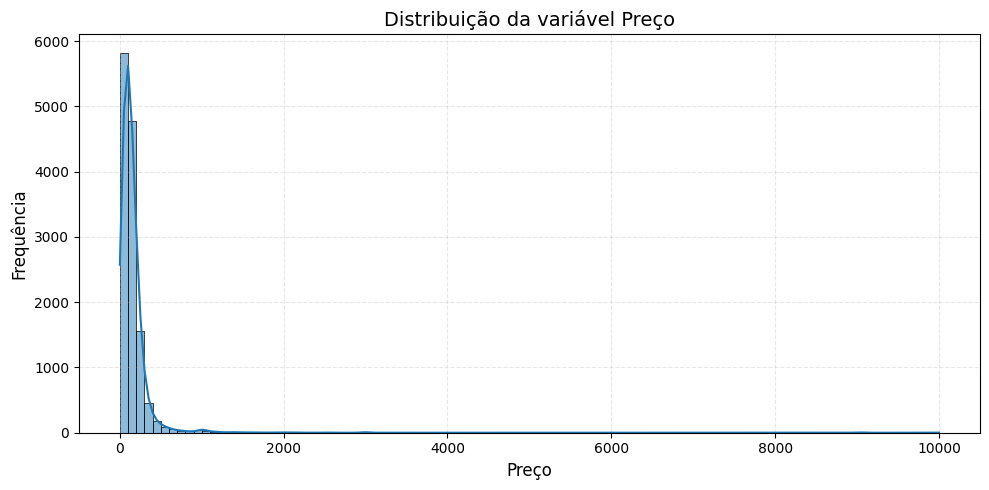

In [ ]:
banco1 = banco[banco['price'].notna()]

plt.figure(figsize=(10, 5))
sns.histplot(banco1['price'], bins=100, kde=True)
plt.title('Distribuição da variável Preço', fontsize=14)
plt.xlabel('Preço', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

O gráfico revela uma distribuição fortemente assimétrica à direita, característica comum em contextos econômicos, como preços de produtos ou serviços. O histograma mostra que a grande maioria dos dados está concentrada em valores baixos, abaixo de 1000 euros, enquanto uma pequena parcela de observações apresenta valores muito elevados, formando uma cauda longa à direita. Essa distribuição indica a presença de outliers que podem influenciar medidas como a média, tornando-a maior do que a mediana.

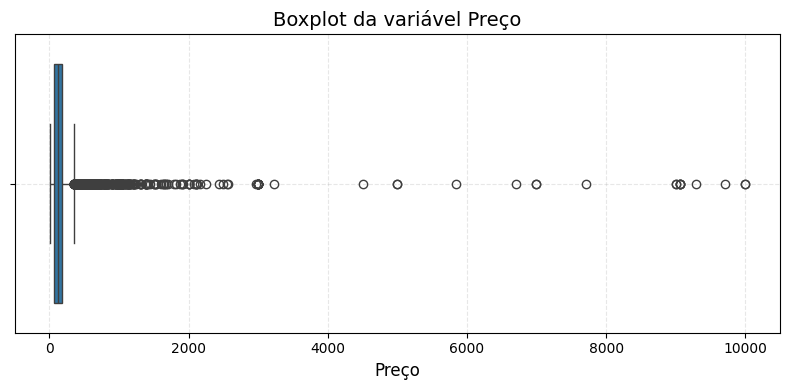

In [ ]:
plt.figure(figsize=(8, 4))
sns.boxplot(x=banco1['price'])
plt.title('Boxplot da variável Preço', fontsize=14)
plt.xlabel('Preço', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

O boxplot reforça o comportamento apresentado no histograma, evidenciando uma grande quantidade de valores atípicos acima do terceiro quartil. A mediana está situada próxima ao limite inferior da caixa, indicando que pelo menos 50% dos dados possuem preços relativamente baixos. Os muitos círculos acima da caixa representam observações fora do limite superior, confirmando a existência de uma cauda longa e uma alta dispersão nos dados. Os outliers detectados indicam que existe uma parcela pequena de hospedagens com preços extremamente elevados.

### Análise de Preço por Bairro


Nesta seção, analisam-se os preços médios das acomodações por bairro. A tabela a seguir apresenta os bairros com os menores e maiores valores médios de hospedagem, seguidos por uma visualização gráfica.

In [ ]:
precos = banco1.groupby("neighbourhood")["price"].mean().sort_values()
precos = precos[precos > 5]
display(precos)

,price
neighbourhood,
el Turó de la Peira,38.461538
Can Peguera,48.000000
la Vall d'Hebron,49.000000
la Trinitat Nova,50.666667
la Prosperitat,55.058824
...,...
la Vila Olímpica del Poblenou,252.475248
Navas,259.000000
Diagonal Mar i el Front Marítim del Poblenou,287.725191


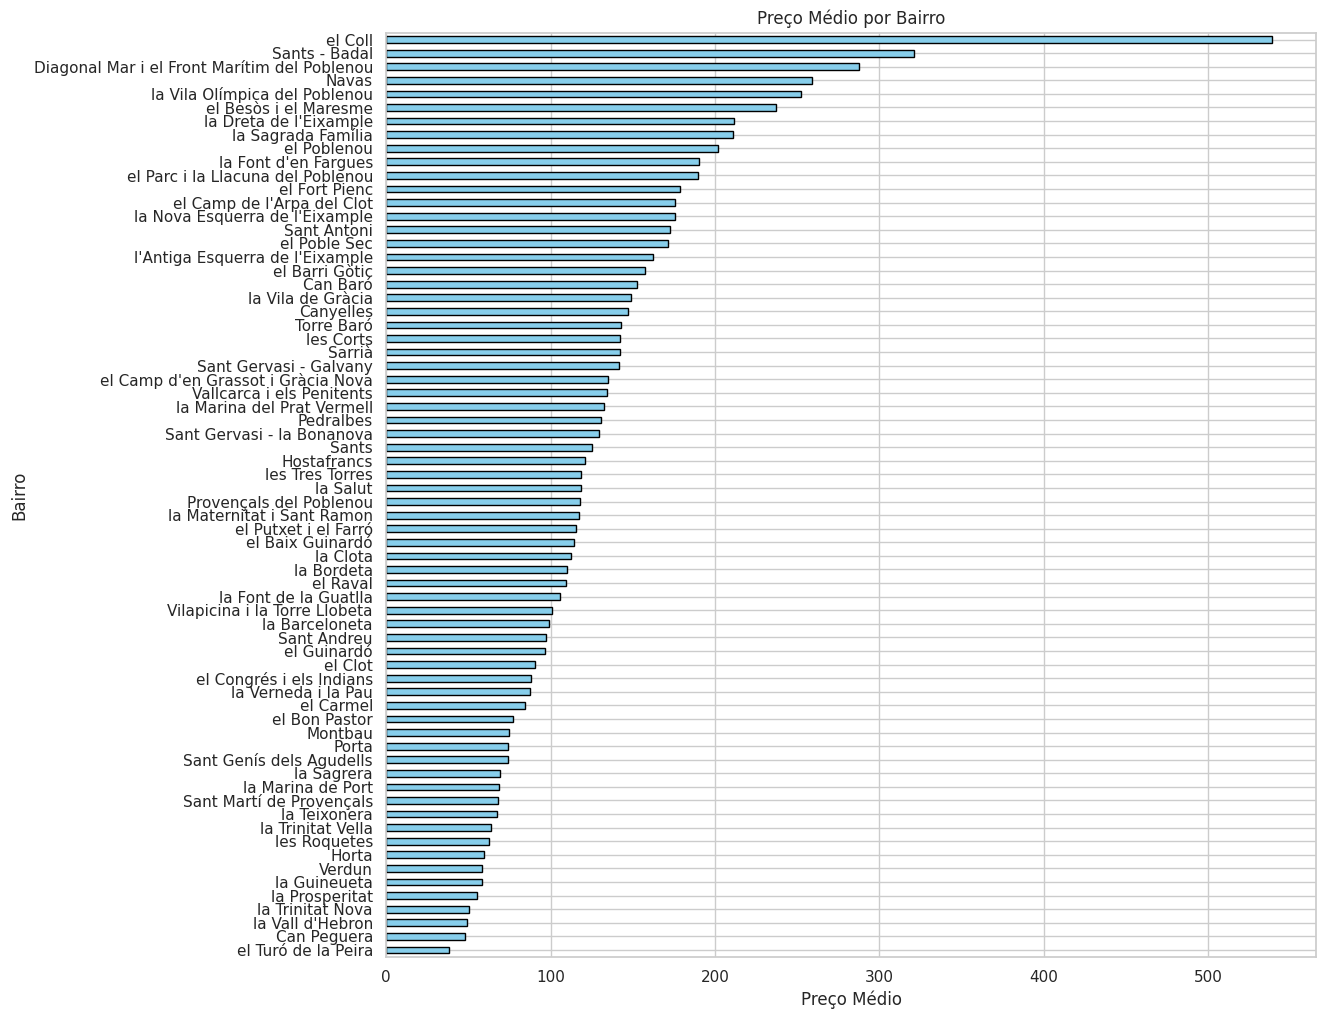

In [ ]:
plt.figure(figsize=(12, 12))
precos.plot(kind='barh', color='skyblue', edgecolor='black')
plt.title("Preço Médio por Bairro")
plt.xlabel("Preço Médio")
plt.ylabel("Bairro")
plt.grid(True)
plt.show()

Com base na tabela e no gráfico, observa-se que o bairro com maior preço médio de hospedagem é el Coll, com 538,76 euros, enquanto o bairro com o menor preço médio é el Turó de la Peira, com 38,46 euros.

A diferença entre os extremos é notável, ultrapassando 500 euros, o que evidencia a desigualdade nos preços médios entre as regiões. Nota-se também que el Coll se destaca de forma significativa em relação aos demais bairros: mesmo o segundo bairro mais caro, Sants - Badal, apresenta um valor médio cerca de 200 euros inferior.

### Visualização Georgráfica

In [ ]:
from IPython.display import HTML
import folium

def mostrar_mapa(mapa, largura=500, altura=400):
    html = mapa.get_root().render()
    display(HTML(f'<div style="width:{largura}px; height:{altura}px;">{html}</div>'))

mapa = folium.Map(location = [41.38328994080733, 2.1786172649806925],
                  zoom_start = 13.5,
                  control_scale= True,
                  width = 500,
                  height = 400)

marker_cluster = MarkerCluster().add_to(mapa)



folium.Marker(
    location = [-15.79981511975103, -47.86399124312488],
    popup = "Congresso Nacional",
    tooltip = "O Congresso Nacional é o órgão constitucional que exerce, no âmbito federal, as funções do poder legislativo, quais sejam, elaborar/aprovar leis e fiscalizar o Estado brasileiro, bem como administrar e julgar."
).add_to(marker_cluster)

### Análise de Relação entre Variáveis

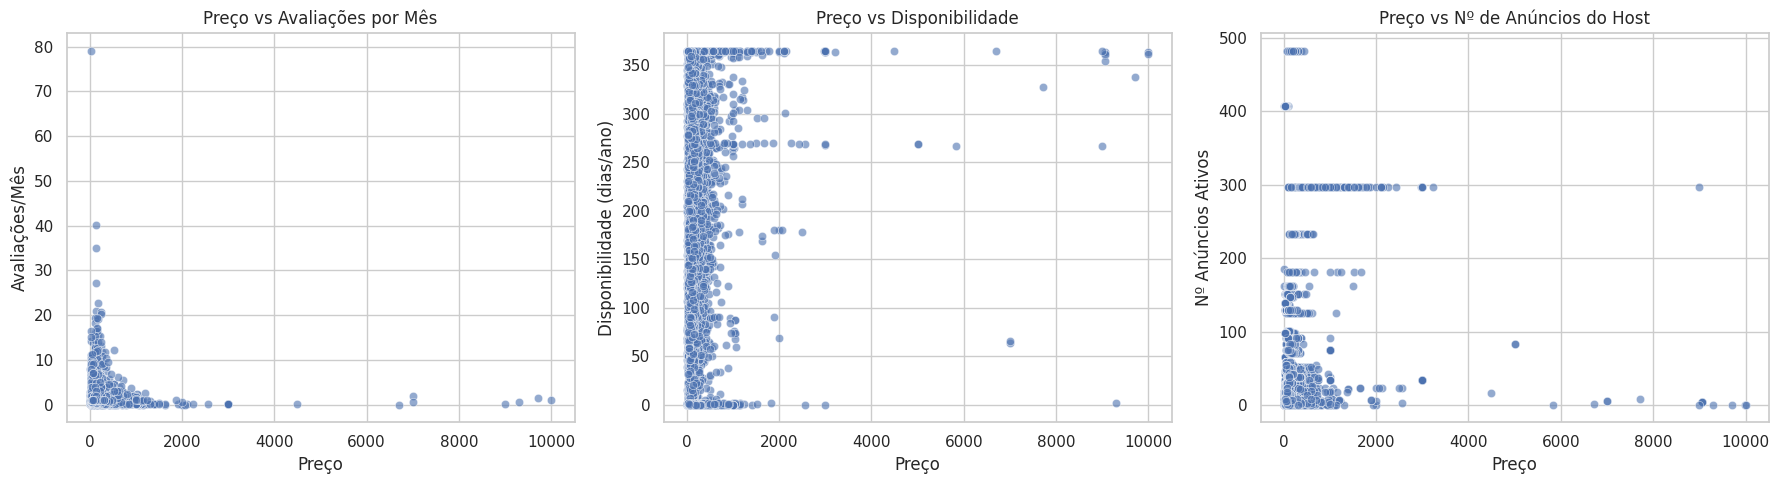

In [ ]:
import seaborn as sns


plt.figure(figsize=(18, 5))


plt.subplot(1, 3, 1)
sns.scatterplot(data=banco, x="price", y="reviews_per_month", alpha=0.6)
plt.title("Preço vs Avaliações por Mês")
plt.xlabel("Preço")
plt.ylabel("Avaliações/Mês")


plt.subplot(1, 3, 2)
sns.scatterplot(data=banco, x="price", y="availability_365", alpha=0.6)
plt.title("Preço vs Disponibilidade")
plt.xlabel("Preço")
plt.ylabel("Disponibilidade (dias/ano)")


plt.subplot(1, 3, 3)
sns.scatterplot(data=banco, x="price", y="calculated_host_listings_count", alpha=0.6)
plt.title("Preço vs Nº de Anúncios do Host")
plt.xlabel("Preço")
plt.ylabel("Nº Anúncios Ativos")

plt.tight_layout()
plt.show()


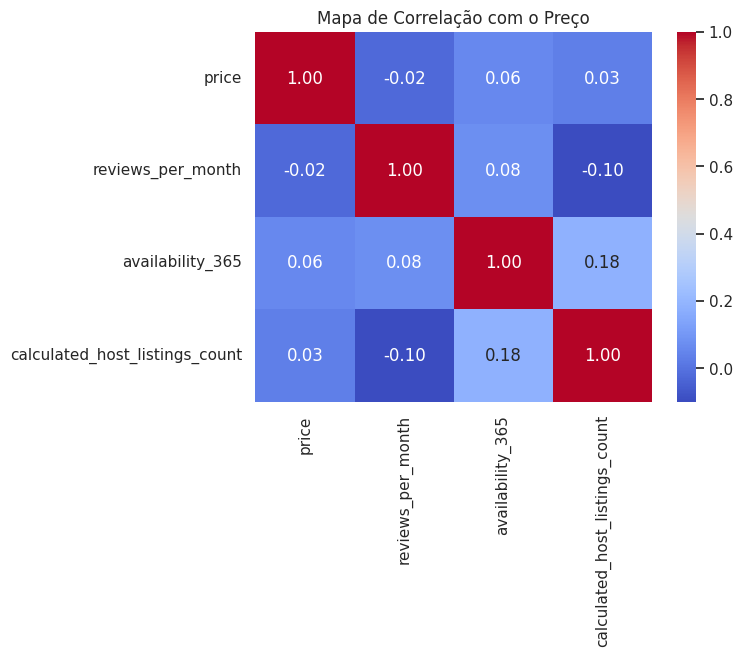

In [ ]:
banco_dummies = pd.get_dummies(banco)
corr = banco_dummies[['price', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count']].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação com o Preço")
plt.show()